In [1]:
import pandas as pd

In [4]:
train_data = pd.read_csv('../../../rawData/train.csv')
#test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
#sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')



In [5]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [6]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### There are no null values in train dataset

In [9]:
 train_data['Exited'].value_counts() 

Exited
0    130113
1     34921
Name: count, dtype: int64

In [10]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

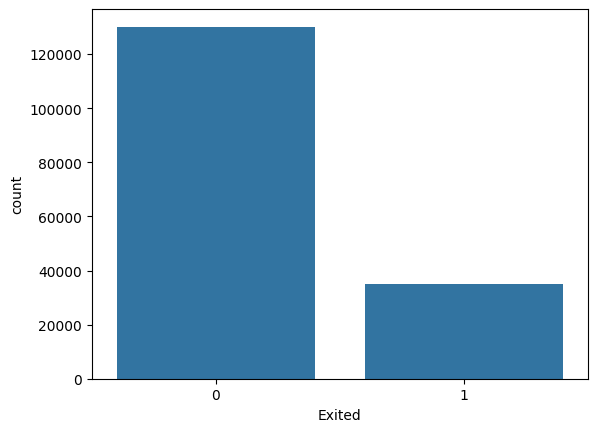

In [11]:
sns.countplot( data=train_data, x='Exited')

### From above graph we can see that the dataset is imbalance

ID, Customer ID and Surname are not required

In [12]:
train_data.drop(['id','CustomerId','Surname'], inplace=True, axis=1)
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<Axes: >

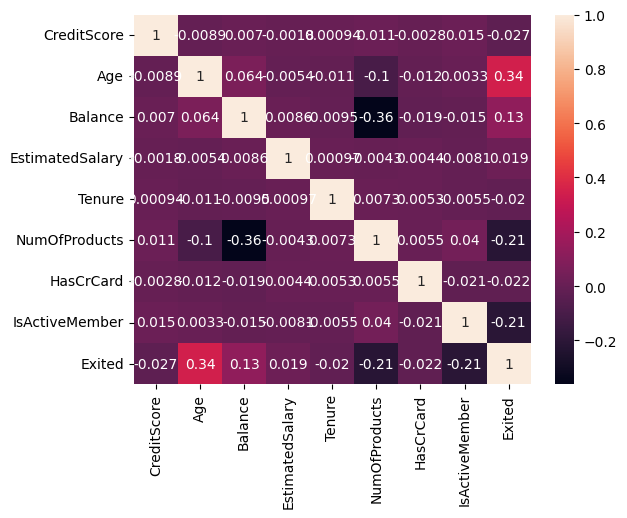

In [13]:
corr_matrix = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].corr()
sns.heatmap(corr_matrix, annot=True)

1. Age, Balance,  are Possitively correlated with Exited variable
2. NumberOfProducts and isActiveMember are negatively correlated with Exited Variable
3. we can observe multi colinearity 
    - b/w NumOfProducts and Age
    - b/w NumOfProducts and Balance

In [14]:
X = train_data.drop('Exited', axis=1)
y = train_data['Exited']

In [15]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'], drop_first=True)

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1.0,HasCrCard_1.0,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,3,0.00,181449.97,False,False,True,False,True,True,False,False
1,627,33.0,1,0.00,49503.50,False,False,True,True,True,True,False,False
2,678,40.0,10,0.00,184866.69,False,False,True,False,True,True,False,False
3,581,34.0,2,148882.54,84560.88,False,False,True,True,True,False,False,False
4,716,33.0,5,0.00,15068.83,False,True,True,True,True,True,False,False


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    random_state=57, 
                                                    stratify=y)

In [20]:
X_train.shape

(123775, 13)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1.0,HasCrCard_1.0,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
157503,463,35.0,2,113034.72,167773.55,False,True,False,True,False,False,False,False
91064,608,41.0,1,106648.98,7063.60,True,False,True,False,True,False,False,False
140893,587,31.0,9,0.00,93716.38,False,False,True,False,True,True,False,False
41365,716,35.0,3,0.00,18657.77,False,False,True,False,True,True,False,False
139082,676,34.0,5,0.00,88965.64,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,633,49.0,10,69712.74,161479.19,False,False,True,False,False,False,False,False
87664,627,34.0,4,0.00,69584.30,False,True,True,True,True,True,False,False
58947,637,40.0,2,115532.52,107499.71,True,False,False,True,False,False,False,False
104065,523,44.0,9,0.00,169122.54,False,False,False,False,True,False,False,False


In [16]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 

In [18]:

model = RandomForestClassifier() 
model.fit(X_train, y_train) 
  
# predict the mode 
y_pred = model.predict(X_test) 
  
# performance evaluatio metrics 
print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     34834
           1       0.54      0.73      0.62      6425

    accuracy                           0.86     41259
   macro avg       0.74      0.81      0.77     41259
weighted avg       0.88      0.86      0.87     41259



In [19]:
type(y_pred)

numpy.ndarray

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[30775,  1754],
       [ 4059,  4671]])

In [17]:
import matplotlib.pyplot as plt

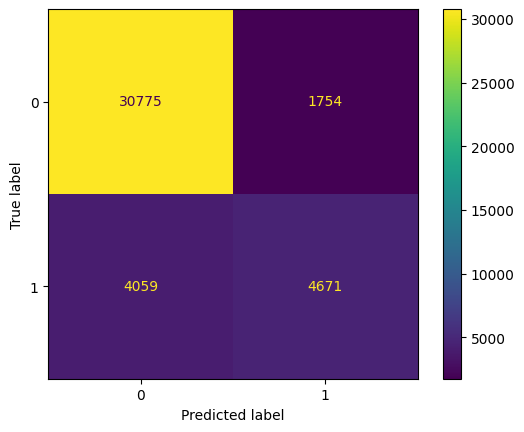

In [23]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm.plot()
plt.show()

In [ ]:

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, verbose=1) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

In [ ]:
model1 = RandomForestClassifier()
model1.set_params(**grid_search.best_params_)

model1.fit(X_train, y_train) 
y_pred_grid = model1.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

In [ ]:
type(y_pred_grid)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
confusion_matrix1 = confusion_matrix(y_test, y_pred_grid)
cm1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1)
cm1.plot()
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
 


LogisticRegression(random_state=0)

In [23]:
y_pred_lr = clf.predict(X_test)
print(classification_report(y_pred_lr, y_test)) 


              precision    recall  f1-score   support

           0       0.96      0.80      0.88     39051
           1       0.12      0.47      0.19      2208

    accuracy                           0.79     41259
   macro avg       0.54      0.64      0.53     41259
weighted avg       0.92      0.79      0.84     41259



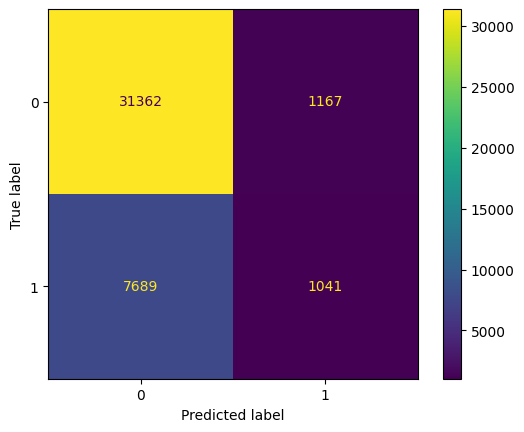

In [24]:
confusion_matrix1 = confusion_matrix(y_test, y_pred_lr)
cm1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1)
cm1.plot()
plt.show()

In [38]:
param_grid = {
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'penalty':['l2','elasticnet'],
    'C':[100, 10, 1.0, 0.1, 0.01]
}

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [40]:
model = LogisticRegression(random_state=0, max_iter=10000)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

In [41]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [44]:
clf = LogisticRegression(**grid_search.best_params_)
clf.fit(X_train,y_train)
y_pred_lr = clf.predict(X_test)
print(classification_report(y_pred_lr, y_test)) 

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


              precision    recall  f1-score   support

           0       0.95      0.88      0.91     34980
           1       0.52      0.72      0.60      6279

    accuracy                           0.85     41259
   macro avg       0.73      0.80      0.76     41259
weighted avg       0.88      0.85      0.86     41259



/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [28]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[30748,  1781],
       [ 4232,  4498]])

In [49]:
import xgboost as xgb

In [50]:
clf_xgb_v1 = xgb.XGBClassifier(objective='binary:logistic',
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])   

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.87640
[1]	validation_0-auc:0.88389
[2]	validation_0-auc:0.88554
[3]	validation_0-auc:0.88709
[4]	validation_0-auc:0.88757
[5]	validation_0-auc:0.88830
[6]	validation_0-auc:0.88869
[7]	validation_0-auc:0.88908
[8]	validation_0-auc:0.88924
[9]	validation_0-auc:0.88950
[10]	validation_0-auc:0.88969
[11]	validation_0-auc:0.88980
[12]	validation_0-auc:0.88991
[13]	validation_0-auc:0.89009
[14]	validation_0-auc:0.89022
[15]	validation_0-auc:0.89034
[16]	validation_0-auc:0.89039
[17]	validation_0-auc:0.89042
[18]	validation_0-auc:0.89046
[19]	validation_0-auc:0.89043
[20]	validation_0-auc:0.89049
[21]	validation_0-auc:0.89057
[22]	validation_0-auc:0.89065
[23]	validation_0-auc:0.89066
[24]	validation_0-auc:0.89060
[25]	validation_0-auc:0.89065
[26]	validation_0-auc:0.89074
[27]	validation_0-auc:0.89075
[28]	validation_0-auc:0.89084
[29]	validation_0-auc:0.89084
[30]	validation_0-auc:0.89084
[31]	validation_0-auc:0.89086
[32]	validation_0-auc:0.89082
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
predictions_1 = clf_xgb_v1.predict(X_test)



In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_1)

In [57]:
cm

array([[30869,  1660],
       [ 3860,  4870]])

In [ ]:

param_grid = {
    'max_depth': [5, 6, 7],
     'learning_rate': [0.1, 0.5, 1],
     'gamma': [1.0, 1.5, 2],
     'reg_lambda': [10.0, 25.0,50.0],
     'scale_pos_weight': [5, 7, 9]
 }

optimal_parameters = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic',
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=3,
     n_jobs=10,
     cv=3
 )
optimal_parameters.fit(X_train,
                        y_train,
                        early_stopping_rounds=10,
                        eval_metric='auc',
                        eval_set=[(X_test, y_test)],
                        verbose=True)
print(optimal_parameters.best_params_)

In [61]:
print(optimal_parameters.best_params_)

{'gamma': 1.0, 'learning_rate': 0.5, 'max_depth': 5, 'reg_lambda': 50.0, 'scale_pos_weight': 5}


In [62]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.5,
                               max_depth=5,
                               reg_lambda=50.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79474
[1]	validation_0-auc:0.82366
[2]	validation_0-auc:0.82065
[3]	validation_0-auc:0.82576
[4]	validation_0-auc:0.83258
[5]	validation_0-auc:0.83347
[6]	validation_0-auc:0.83366
[7]	validation_0-auc:0.83438
[8]	validation_0-auc:0.83466
[9]	validation_0-auc:0.86860
[10]	validation_0-auc:0.88360
[11]	validation_0-auc:0.88352
[12]	validation_0-auc:0.88719
[13]	validation_0-auc:0.88774
[14]	validation_0-auc:0.88842
[15]	validation_0-auc:0.88843
[16]	validation_0-auc:0.88860
[17]	validation_0-auc:0.88935
[18]	validation_0-auc:0.88943
[19]	validation_0-auc:0.88947
[20]	validation_0-auc:0.88974
[21]	validation_0-auc:0.88977
[22]	validation_0-auc:0.88994
[23]	validation_0-auc:0.88994
[24]	validation_0-auc:0.89060
[25]	validation_0-auc:0.89067
[26]	validation_0-auc:0.89067
[27]	validation_0-auc:0.89066
[28]	validation_0-auc:0.89076
[29]	validation_0-auc:0.89069
[30]	validation_0-auc:0.89073
[31]	validation_0-auc:0.89074
[32]	validation_0-auc:0.89076
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
predictions_2 = clf_xgb_v2.predict(X_test)

confusion_matrix(y_test, predictions_2, labels=clf_xgb_v2.classes_)


array([[24925,  7604],
       [ 1368,  7362]])

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense


2024-02-02 06:58:40.622503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 06:58:40.622638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 06:58:40.788719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [19]:
ann = Sequential()

In [23]:
ann.add(Dense(units = 26, activation = 'relu', input_dim = 13))
ann.add(Dense(units = 52, activation = 'relu'))
ann.add(Dense(units = 26, activation = 'relu'))
ann.add(Dense(units = 13, activation = 'relu'))
ann.add(Dense(units = 7, activation = 'relu'))
ann.add(Dense(units = 4, activation = 'relu'))
ann.add(Dense(units = 1, activation = 'sigmoid'))

In [24]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [25]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 52)                1404      
                                                                 
 dense_2 (Dense)             (None, 26)                1378      
                                                                 
 dense_3 (Dense)             (None, 13)                351       
                                                                 
 dense_4 (Dense)             (None, 7)                 98        
                                                                 
 dense_5 (Dense)             (None, 4)                 32        
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [26]:
ann.fit(X_train_s,y_train,batch_size=32,epochs = 100)

Epoch 1/100


I0000 00:00:1706857576.197486      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3868/3868 [==============================] - 20s 4ms/step - loss: 0.4299 - accuracy: 0.8538
Epoch 2/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3362 - accuracy: 0.8631
Epoch 3/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3283 - accuracy: 0.8632
Epoch 4/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3263 - accuracy: 0.8636
Epoch 5/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3250 - accuracy: 0.8640
Epoch 6/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3245 - accuracy: 0.8638
Epoch 7/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3240 - accuracy: 0.8640
Epoch 8/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3231 - accuracy: 0.8643
Epoch 9/100
3868/3868 [==============================] - 15s 4ms/step - loss: 0.3226 - accuracy: 0.8643
Epoch 10/100
3868/3868 [==============================] - 15s 4ms/step - los

In [30]:
predictions_3=ann.predict(X_test_s)


1290/1290 [==============================] - 2s 2ms/step


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
predictions_3

array([[0.03740319],
       [0.01966188],
       [0.01260968],
       ...,
       [0.02524495],
       [0.21340567],
       [0.02187535]], dtype=float32)

In [34]:

confusion_matrix(y_test, predictions_3>0.5)

array([[30955,  1574],
       [ 4105,  4625]])